This code seeks to transform a set of one or more user images with an autoencoder after it trains the autoencoder on images of fruit (apples, oranges, or bananas). It does this with images from a google drive folder. The user must tell the program the file paths to find the images.

For the code review, I would like to discuss simplifying my code, specifically with the `get_input` method in the `TakeInput` class. 

Enter the path for the folder of training images: /content/drive/MyDrive/Colab Notebooks/train
Enter the name of the images you want the autoencoder to train on: apple
Enter the number of training images: 95
Enter the path of the folder for the image(s) you want to transform: /content/drive/MyDrive/Colab Notebooks/test
Enter the name of the image(s) you want to transformtest
Enter the number of image(s) you want to transform (between 1 and 10): 10


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/500
3/3 [==============================] - 0s 63ms/step - loss: 0.1372 - val_loss: 0.0914
Epoch 2/500
3/3 [==============================] - 0s 23ms/step - loss: 0.1214 - val_loss: 0.1058
Epoch 3/500
3/3 [==============================] - 0s 21ms/step - loss: 0.1018 - val_loss: 0.1041
Epoch 4/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0870 - val_loss: 0.0964
Epoch 5/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0813 - val_loss: 0.0951
Epoch 6/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0790 - val_loss: 0.0901
Epoch 7/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0776 - val_loss: 0.0927
Epoch 8/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0762 - val_loss: 0.0885
Epoch 9/500
3/3 [==============================] - 0s 21ms/step - loss: 0.0733 - val_loss: 0.0843
Epoch 10/500
3/3 [==============================] - 0s 22ms/step - loss: 0.0707 - val_loss: 0.0875
Epoch 11/500
3/3 [=

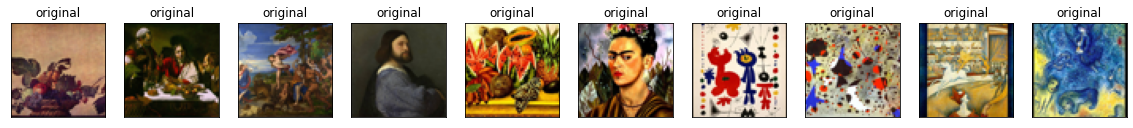

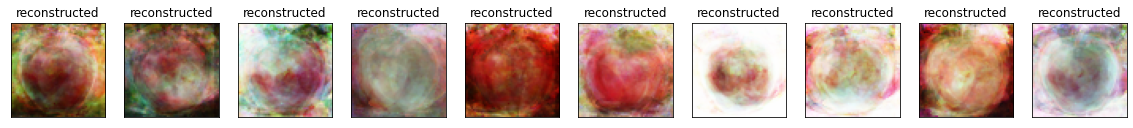

In [7]:
# Code draft for code review.

import PIL
from PIL import Image
import numpy as np
import sys
from matplotlib import image
from matplotlib import pyplot as plt
from google.colab import files
import os.path
from os import path
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

class Autoencoder(Model):
  '''
  Define the autoencoder with help from the tensorflow library.

  Attributes:
    __latent_dim: The number of latent dimentions the images get mapped onto.
    __epochs: The number of epochs the autoencoder goes through to train.
    encoder: The encoder layers of the autoencoder.
    decoder: The decoder layers of the autoencoder.
  '''
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.__latent_dim = 64
    self.__epochs = 500
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(self.__latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(10800, activation='sigmoid'),
      layers.Reshape((60, 60, 3))
    ])

  def call(self, x):
    '''
    Call the encoder and decoder.
    '''
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

  def set_latent_dim(self, latent_dim): 
    '''
    Change number of latent dimentions.
    '''
    self.__latent_dim = latent_dim

  def set_epochs(self, epochs): 
    '''
    Change number of epochs.
    '''
    self.__epochs = epochs


class Controller:
  """
  Generic controller for the autoencoder.

  This class should not be used directly, as its get_input method does
  nothing. Instead, this class should be inherited from and the subclass used
  to actually send input to the autoencoder.
  """

  def get_input(self):
    """
    Translate input from the user into a the file locations of the images to
    tranform.
    """
    pass


class TakeInput(Controller):
  '''
  Get input from the user.
  '''

  def get_input(self): 
    '''
    Take input from the user and determine if the input is valid and what should
    be done with it.
    
    Print a prompt for the user and given input, call __invalid_input(),
    __quit(), or return file locations and file names to be used in the
    FormatData class.
    '''
    # Get the path for the folder of training images.
    train_folder_input = input(
        "Enter the path for the folder of training images: ")
    train_folder = train_folder_input.strip()

    # Get the type of fruit they want to train on.
    train_image_input = input(
        "Enter the name of the images you want the autoencoder to train on: ")
    train_image = train_image_input.strip()

    # Make sure the previous inputs are valid and there are training images in
    # the location provided.
    file_name = (f'{train_image}_{1}.jpg')
    file_location = (f'{train_folder}/{file_name}')
    if not os.path.isfile(file_location):
      self.__invalid_input()

    # Get the number of images to train on.
    train_num_input = input("Enter the number of training images: ")
    train_num = train_num_input.strip()
    train_num = int(train_num)
    
    # Get the path for the folder of the user image(s).
    test_folder_input = input(
        "Enter the path of the folder for the image(s) you want to transform: ")
    test_folder = test_folder_input.strip()
    
    # Get the name of the image(s) to transform.
    test_image_input = input(
        "Enter the name of the image(s) you want to transform")
    test_image = test_image_input.strip()

    # Get the number of images the user wants to transform.
    test_num_input = input(
      "Enter the number of image(s) you want to transform (between 1 and 10): ")
    test_num = test_num_input.strip()

    # Make sure the input is an integer between 1 and 10.
    test_num = int(test_num)
    if (not isinstance(test_num, int) or 0 > test_num or 
                       test_num > 10):
      self.__invalid_input()
    else:
      # Make sure the previous inputs are valid and there are files in the
      # location provided.
      for i in range(1, test_num + 1):
        file_name = (f'{test_image}_{i}.jpg')
        file_location = (f'{test_folder}/{file_name}')
        if not os.path.isfile(file_location):
          self.__invalid_input()
    return (train_folder, train_image, train_num, test_folder, test_image, 
            test_num)

  def __invalid_input(self): 
    '''
    Print an error message if user input is invalid.
    '''
    print("Invalid input. Please try again.")
    self.get_input()


class View:
  """
  Generic view for the autoencoder.

  This class should not be used directly, as its methods do nothing. Instead,
  this class should be inherited from and the subclass used to actually
  display the images.
  """
  def display_input(self, images, num_images):
    '''
    Display original input image(s).
    '''
    pass

  def display_output(self, decoded, num_images):
    '''
    Display output image(s).
    '''
    pass


class ViewImages(View):
  '''
  Display the input images and their output after going through the autoencoder.
  '''

  def display_input(self, images, num_images):
    '''
    Display original input image(s).
    '''
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
      ax = plt.subplot(2, num_images, i + 1)
      plt.imshow(images[i])
      plt.title("original")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
    plt.show()

  def display_output(self, decoded, num_images):
    '''
    Display output image(s).
    '''
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
      ax = plt.subplot(2, num_images, i + 1 + num_images)
      plt.imshow(decoded[i])
      plt.title("reconstructed")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)


class FormatData:
  '''
  Format image data for use in the autoencoder.

  Attributes: 
    __file_location: Folder path for images.
    __image_name: Name of all images.
    __image_size: Pixel dimention for square images.
  '''
  def __init__(self):
    self.__file_location = '/content/drive/MyDrive/Colab Notebooks/train'
    self.__image_name = 'orange'
    self.__image_size = 60

  def set_file_location(self, file_location):
    '''
    Define the location of the image files.
    '''
    self.__file_location = file_location

  def set_image_name(self, image_name):
    '''
    Define the name for all the image. This assumes images used all have the
    same name with numbers after (ex. 'image (1).jpg', 'image (2).jpg', etc.)
    '''
    self.__image_name = image_name

  def set_image_size(self, image_size):
    '''
    Define the dimention of input and output images.
    '''
    self.__image_size = image_size

  def __get_image(self, image_num):
    '''
    Get individual image file.
    '''
    file_name = (f'{self.__image_name}_{image_num}.jpg')
    file_location = (f'{self.__file_location}/{file_name}')
    if not os.path.isfile(file_location):
      return False
    else:
      im = Image.open(file_location)
      im = im.convert('RGB')
      return im

  def __square_image(self, image):
    '''
    Crop image into a squre with the dimentions defined by __image_size.
    '''
    width, height = image.size
    if width >= height:
      min_dimention = height
    else:
      min_dimention = width
    width_1 = int((width - min_dimention) / 2)
    height_1 = int((height - min_dimention) / 2)
    box = (width_1, height_1, width - width_1, height - height_1)
    image_cropped = image.crop(box)
    image = image_cropped.resize((self.__image_size, self.__image_size))
    return image

  def __get_vector(self, image):
    '''
    Return an image as a vector of values between 0 and 1.
    '''
    vector = np.ravel(np.asarray(image)) / 255
    return vector

  def get_image_set(self, num_images):
    '''
    Return a matrix of images given the number of the start image and end image.
    '''
    image_count = num_images
    image = self.__get_image(1)
    crop = self.__square_image(image)
    vector_all = self.__get_vector(crop)
    for i in range(2, num_images + 1):
      if not self.__get_image(i):
        image_count -= 1
        continue
      else:
        image = self.__get_image(i)
        crop = self.__square_image(image)
        vector = self.__get_vector(crop)
        vector_all = np.vstack((vector_all, vector))
    return np.reshape(vector_all, ((image_count), 60, 60, 3))


def main():
  '''
  Run the software to train on a set of images and transform a new set of one or
  more images.
  '''
  autoencoder = Autoencoder()
  controller = TakeInput()
  display = ViewImages()
  data = FormatData()
  fruit_images = data.get_image_set(90)

  response = controller.get_input()
  if response is not None:
    train_folder, train, train_num, test_folder, test, test_num = response
    data.set_file_location(train_folder)
    data.set_image_name(train)
    train_images = data.get_image_set(train_num)
    data.set_file_location(test_folder)
    data.set_image_name(test)
    user_images = data.get_image_set(test_num)

    autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
    autoencoder.fit(train_images, train_images,
                    epochs=500,
                    shuffle=True,
                    validation_data=(user_images, user_images))
    encoded = autoencoder.encoder(user_images).numpy()
    decoded = autoencoder.decoder(encoded).numpy()
    display.display_input(user_images, test_num)
    display.display_output(decoded, test_num)


if __name__ == "__main__":
  main()

# Likely folder paths
# /content/drive/MyDrive/Colab Notebooks/train
# /content/drive/MyDrive/Colab Notebooks/test